<a href="https://colab.research.google.com/github/Adithya0010/Loan-Eligibility-Prediction/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing packages
import numpy as np
import pandas as pd

In [7]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Eligibility_Prediction.csv')
df.head()

,Customer_ID,Age,Income,Loan_Amount,Credit_Score,Employment_Status,Loan_Term,Existing_Debts,Dependents,Marital_Status,Home_Ownership,Loan_Eligibility
0,23fca140-994c-4f72-bdd5-b10e7dd8721b,25,30853.178902,6836.540716,719,Employed,36,472.718531,1,Single,NaN,0
1,131fb393-30ae-4c9a-a589-4441f6205e79,67,73731.524394,10929.937294,311,Self-Employed,36,7012.589111,2,Single,Owned,0
2,4632e679-8d4b-4f89-80ba-2231e0da02e2,22,79841.113694,32863.204478,741,Employed,60,1805.103080,1,Single,Mortgage,0
3,eb35b0ca-c4db-4e2d-b3fd-d34c3f54abf6,44,107656.940004,22942.096220,700,Unemployed,36,7848.094780,3,Married,Owned,1
4,36853048-ad28-451b-9c53-989c6a582fe1,42,40592.748810,21190.875730,798,Unemployed,48,10867.888661,2,Single,Mortgage,1


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# See the no. of rows and columns
df.shape

(1100, 12)

In [17]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Income', 'Loan_Amount', 'Credit_Score', 'Employment_Status', 'Loan_Term', 'Existing_Debts', 'Dependents', 'Marital_Status', 'Home_Ownership', 'Loan_Eligibility']


In [18]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Income,float64
Loan_Amount,float64
Credit_Score,int64
Employment_Status,object
Loan_Term,int64
Existing_Debts,float64
Dependents,int64
Marital_Status,object


In [19]:
df.describe()

,Age,Income,Loan_Amount,Credit_Score,Loan_Term,Existing_Debts,Dependents,Loan_Eligibility
count,1100.000000,1100.000000,1008.000000,1100.000000,1100.000000,1068.000000,1100.000000,1100.000000
mean,43.525455,84960.040532,27035.209730,572.492727,35.683636,9854.032610,1.944545,0.500909
std,15.154356,37437.764791,12923.383721,155.403537,16.699068,5774.275314,1.399212,0.500227
min,18.000000,20104.462425,5003.917912,300.000000,12.000000,13.774928,0.000000,0.000000
25%,30.000000,52903.407486,15789.629549,442.750000,24.000000,4863.218789,1.000000,0.000000
50%,44.000000,86456.497211,26564.221135,567.500000,36.000000,9758.726658,2.000000,1.000000
75%,57.000000,117120.866818,37885.652903,702.250000,48.000000,14841.258507,3.000000,1.000000
max,69.000000,149927.385525,49986.108875,848.000000,60.000000,19950.711981,4.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        1100 non-null   object 
 1   Age                1100 non-null   int64  
 2   Income             1100 non-null   float64
 3   Loan_Amount        1008 non-null   float64
 4   Credit_Score       1100 non-null   int64  
 5   Employment_Status  1100 non-null   object 
 6   Loan_Term          1100 non-null   int64  
 7   Existing_Debts     1068 non-null   float64
 8   Dependents         1100 non-null   int64  
 9   Marital_Status     1100 non-null   object 
 10  Home_Ownership     1042 non-null   object 
 11  Loan_Eligibility   1100 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 103.2+ KB


In [21]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Loan_Amount,92
Credit_Score,0
Employment_Status,0
Loan_Term,0
Existing_Debts,32
Dependents,0
Marital_Status,0


In [22]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove

In [23]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Employment_Status', 'Marital_Status', 'Home_Ownership'], dtype='object')

In [24]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [25]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())

In [26]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [27]:
# find the null values
df.isnull().sum()

,0
Age,0
Income,0
Loan_Amount,0
Credit_Score,0
Employment_Status,0
Loan_Term,0
Existing_Debts,0
Dependents,0
Marital_Status,0
Home_Ownership,0


In [28]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Income,Loan_Amount,Credit_Score,Employment_Status,Loan_Term,Existing_Debts,Dependents,Marital_Status,Home_Ownership,Loan_Eligibility
0,25,30853.178902,6836.540716,719,0,36,472.718531,1,2,2,0
1,67,73731.524394,10929.937294,311,1,36,7012.589111,2,2,1,0
2,22,79841.113694,32863.204478,741,0,60,1805.103080,1,2,0,0
3,44,107656.940004,22942.096220,700,2,36,7848.094780,3,1,1,1
4,42,40592.748810,21190.875730,798,2,48,10867.888661,2,2,0,1


In [29]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()

,Age,Income,Loan_Amount,Credit_Score,Employment_Status,Loan_Term,Existing_Debts,Dependents,Marital_Status,Home_Ownership,Loan_Eligibility
0,0.137255,0.082795,0.040741,0.764599,0,0.50,0.023020,0.25,2,2,0.0
1,0.960784,0.413079,0.131741,0.020073,1,0.50,0.351048,0.50,2,1,0.0
2,0.078431,0.460139,0.619340,0.804745,0,1.00,0.089850,0.25,2,0,0.0
3,0.509804,0.674399,0.398784,0.729927,2,0.50,0.392955,0.75,1,1,1.0
4,0.470588,0.157817,0.359853,0.908759,2,0.75,0.544422,0.50,2,0,1.0


In [30]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Loan_Eligibility', axis=1)  # -- independent variable
y = df['Loan_Eligibility'] # -- dependent variable

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [39]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.5318181818181819
Logistic Regression Confusion Matrix:
 [[60 41]
 [62 57]]


In [40]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [43]:
print("Random Forest Accuracy:", rf_accuracy*100)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 52.72727272727272
Random Forest Confusion Matrix:
 [[57 44]
 [60 59]]


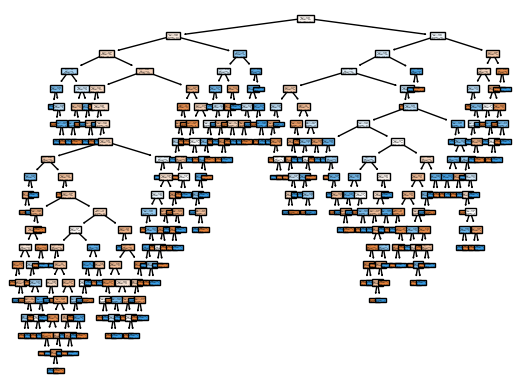

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [46]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [47]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
